# Imports

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import euclidean
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pearson
              S7    Modbus
S7      1.000000 -0.034557
Modbus -0.034557  1.000000
Spearman
              S7    Modbus
S7      1.000000  0.158461
Modbus  0.158461  1.000000


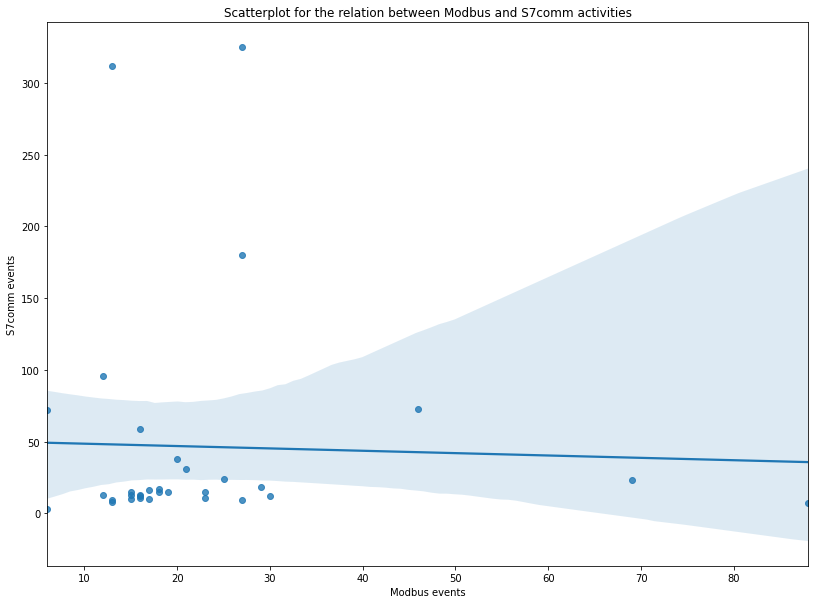

In [18]:
# Create a Pandas dataframe from a Zeek log

df= pd.read_csv('/content/drive/MyDrive/Universita/Magistrale/Tesi/ZeekML/Logs/cross_corr.csv')


!pip install tslearn
from tslearn.metrics import dtw







filter_df=df[['S7','Modbus']]

print("Pearson")
print(filter_df.corr(method='pearson',min_periods=1))
print("Spearman")
print(filter_df.corr(method='spearman',min_periods=10))


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

filter_df = scaler.fit_transform(filter_df)



s1 = filter_df[:,0]

s2 = filter_df[:,1]

#s2 = filter_df['Modbus'].to_list()
fig = plt.figure(figsize=(30,10))

fig.add_subplot(121)
l = sns.regplot(x="S7", y="Modbus", fit_reg=True, data=df);

plt.xlabel('Modbus events');
plt.ylabel('S7comm events');
plt.title('Scatterplot for the relation between Modbus and S7comm activities');


##Granger Casuality Test

In [ ]:
#ax = sns.lineplot(x="timestamp", y="S7", data=df)
#ax1 = sns.lineplot(x="timestamp", y='Modbus', data=df)

res = grangercausalitytests(df[['S7', 'Modbus']], maxlag=9)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1021  , p=0.7517  , df_denom=28, df_num=1
ssr based chi2 test:   chi2=0.1130  , p=0.7368  , df=1
likelihood ratio test: chi2=0.1128  , p=0.7370  , df=1
parameter F test:         F=0.1021  , p=0.7517  , df_denom=28, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1802  , p=0.8362  , df_denom=25, df_num=2
ssr based chi2 test:   chi2=0.4324  , p=0.8056  , df=2
likelihood ratio test: chi2=0.4293  , p=0.8068  , df=2
parameter F test:         F=0.1802  , p=0.8362  , df_denom=25, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1914  , p=0.9011  , df_denom=22, df_num=3
ssr based chi2 test:   chi2=0.7570  , p=0.8597  , df=3
likelihood ratio test: chi2=0.7473  , p=0.8620  , df=3
parameter F test:         F=0.1914  , p=0.9011  , df_denom=22, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4150  , p=0.7957  , df_d

Dynamic Time Warping

In [ ]:

!pip install dtaidistance
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import random


from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

#
s7 = np.array([13, 29, 27, 30, 12, 17, 13, 15, 19, 25, 69, 27, 13,
               23,12,17,15,18,6,28,88,16,23,16,15,46,16,27
               ,18,20,6])

print(s7.dtype)


'''
s2 = np.array([312,18,325,12,13,10,9,10,15,24,23,
               180,8,11,96,16,13,15,3,31,7,12,15,
               11,15,73,59,13,9,17,38,72])

'''

path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.pdf")





     |████████████████████████████████| 942kB 9.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.2.5-cp37-cp37m-linux_x86_64.whl size=1552445 sha256=8c43cc9ae748393e9ebc664ac602ec9eb1ef635e2b96bbf94957b4142414a15c
  Stored in directory: /root/.cache/pip/wheels/f8/37/a3/5b68a20ca502772e5affea6be75bf964ad9f481fdc54f28627
Successfully built dtaidistance
int64


(None, None)

##Warping paths

In [ ]:
distance, paths = dtw.warping_paths(s1, s2)

random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)

s1=np.array(s1)
s2=np.array(s2)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path,filename="path.pdf")


[13.07811096 11.07772969 10.69366761]
2


/usr/local/lib/python3.7/dist-packages/dtaidistance/dtw.py:428: RuntimeWarning: invalid value encountered in sqrt
  dtw = np.sqrt(dtw)


(None, None)